In [1]:
import tensorflow as tf
import numpy as np
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

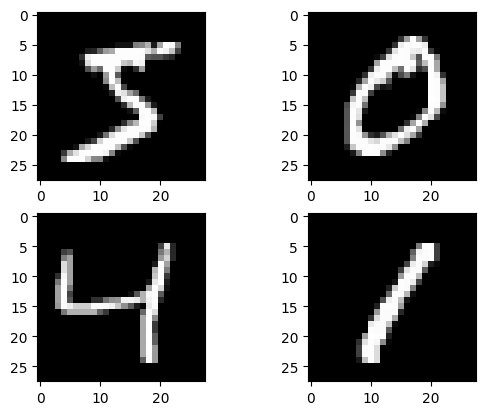

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
print(y_train.shape)

(60000,)


In [5]:
np.max(y_train)

9

In [9]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# build the model
# create model
model = Sequential()
model.add(Dense(num_pixels, input_shape=(num_pixels,),
kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes,
kernel_initializer='normal', activation='softmax'))
# Compile model
# model.compile(loss='categorical_crossentropy',
# optimizer='adam', metrics=['accuracy'])
# Fit the model
Nadam = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


C:\Users\amir_\anaconda3\envs\deeplearning_gpu\lib\site-packages\keras\optimizers\optimizer_v2\nadam.py:86: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
300/300 - 7s - loss: 0.2331 - accuracy: 0.9319 - val_loss: 0.1092 - val_accuracy: 0.9663 - 7s/epoch - 22ms/step
Epoch 2/10
300/300 - 3s - loss: 0.0833 - accuracy: 0.9754 - val_loss: 0.0866 - val_accuracy: 0.9739 - 3s/epoch - 10ms/step
Epoch 3/10
300/300 - 5s - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0730 - val_accuracy: 0.9776 - 5s/epoch - 15ms/step
Epoch 4/10
300/300 - 4s - loss: 0.0327 - accuracy: 0.9903 - val_loss: 0.0693 - val_accuracy: 0.9795 - 4s/epoch - 15ms/step
Epoch 5/10
300/300 - 4s - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.0650 - val_accuracy: 0.9791 - 4s/epoch - 14ms/step
Epoch 6/10
300/300 - 4s - loss: 0.0156 - accuracy: 0.9956 - val_loss: 0.0608 - val_accuracy: 0.9814 - 4s/epoch - 15ms/step
Epoch 7/10
300/300 - 5s - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.0734 - val_accuracy: 0.9798 - 5s/epoch - 15ms/step
Epoch 8/10
300/300 - 5s - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.0678 - val_accuracy: 0.9812 - 5s/epoch - 16ms/step
Epoch 9/10
300/3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


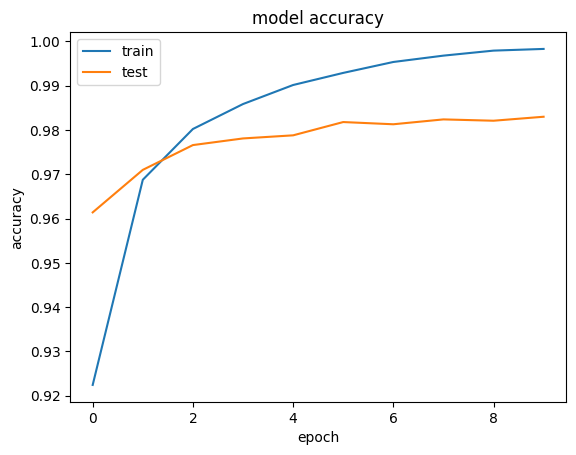

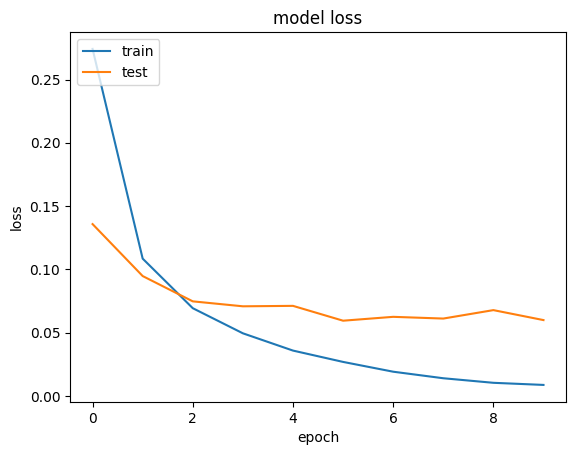

In [8]:
# Fit the model
# history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()